In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dolfin as dl

/Users/afzal-admin/opt/anaconda3/envs/fenics_environment/lib/python3.9/site-packages/dolfin/jit/jit.py:121: RuntimeWarning: mpi4py.MPI.Status size changed, may indicate binary incompatibility. Expected 40 from C header, got 48 from PyObject
  def compile_class(cpp_data, mpi_comm=MPI.comm_world):
/Users/afzal-admin/opt/anaconda3/envs/fenics_environment/lib/python3.9/site-packages/dolfin/jit/jit.py:121: RuntimeWarning: mpi4py.MPI.Datatype size changed, may indicate binary incompatibility. Expected 24 from C header, got 32 from PyObject
  def compile_class(cpp_data, mpi_comm=MPI.comm_world):
/Users/afzal-admin/opt/anaconda3/envs/fenics_environment/lib/python3.9/site-packages/dolfin/jit/jit.py:121: RuntimeWarning: mpi4py.MPI.Request size changed, may indicate binary incompatibility. Expected 32 from C header, got 40 from PyObject
  def compile_class(cpp_data, mpi_comm=MPI.comm_world):
/Users/afzal-admin/opt/anaconda3/envs/fenics_environment/lib/python3.9/site-packages/dolfin/jit/jit.py:121

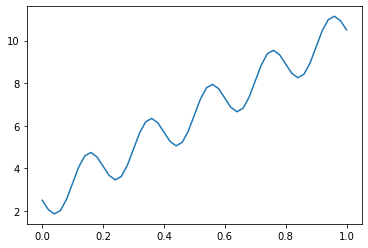

In [14]:
nx   = 50                            #number of cells
mesh = dl.UnitIntervalMesh(nx)       #mesh generation
Vh   = dl.FunctionSpace(mesh,'CG',2) #test function
#f    = dl.Function(Vh)
f    = dl.Expression('-1000*sin(10*pi*pow(x[0],1))', degree=5)

stiffness_form = dl.inner(dl.grad(dl.TrialFunction(Vh)),dl.grad(dl.TestFunction(Vh))) * dl.dx
rhs_form       = f * dl.TestFunction(Vh) * dl.dx

def left_boundary(x, on_boundary):
    if (x[0]==0) and on_boundary:
        return True
    else:
        return False

def right_boundary(x, on_boundary):
    if (x[0]==1) and on_boundary:
        return True
    else:
        return False
    
bc_left  = dl.DirichletBC(Vh, dl.Constant(2.5), left_boundary)
bc_right = dl.DirichletBC(Vh, dl.Constant(10.5),right_boundary)  

u  = dl.Function(Vh)
K  = dl.assemble(stiffness_form)
b  = dl.assemble(rhs_form)

#Applying BC to stiffness matrix
bc_left.apply(K)
bc_right.apply(K)
#Applying BC to RHS vector
bc_left.apply(b)
bc_right.apply(b)

dl.solve(K, u.vector(), b)
dl.plot(u)